In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

%matplotlib inline

In [2]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

---

# LOADING FROM TENSORBOARD
avoid running this if there is no access to logs

---

### n2n_a

In [3]:
n2n_a_1 = EventAccumulator('/hdd/Documents/HRL/experiments/101_Nav_n2n/logs/PPO2_1')
n2n_a_1.Reload()

n2n_a_2 = EventAccumulator('/hdd/Documents/HRL/experiments/103_Nav_n2n_cont/logs/PPO2_1')
n2n_a_2.Reload()

n2n_a_3 = EventAccumulator('/hdd/Documents/HRL/experiments/104_Nav_n2n_cont2/logs/PPO2_1')
n2n_a_3.Reload()

n2n_a_4 = EventAccumulator('/hdd/Documents/HRL/experiments/105_Nav_n2n_cont3/logs/PPO2_1')
n2n_a_4.Reload()

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


In [12]:
a_w_times_1, a_step_nums_1, a_vals_1 = zip(*n2n_a_1.Scalars('episode/episode_reward'))
a_w_times_2, a_step_nums_2, a_vals_2 = zip(*n2n_a_2.Scalars('episode/episode_reward'))
a_w_times_3, a_step_nums_3, a_vals_3 = zip(*n2n_a_3.Scalars('episode/episode_reward'))
a_w_times_4, a_step_nums_4, a_vals_4 = zip(*n2n_a_4.Scalars('episode/episode_reward'))

a_step_nums_2 = tuple([step + max(a_step_nums_1) for step in a_step_nums_2])
a_step_nums_3 = tuple([step + max(a_step_nums_2) for step in a_step_nums_3])
a_step_nums_4 = tuple([step + max(a_step_nums_3) for step in a_step_nums_4])

w_times_n2n   = a_w_times_1 + a_w_times_2 + a_w_times_3 + a_w_times_4
step_nums_n2n = a_step_nums_1 + a_step_nums_2 + a_step_nums_3 + a_step_nums_4
vals_n2n      = a_vals_1 + a_vals_2 + a_vals_3 + a_vals_4

vals_n2n_smooth = smooth(vals_n2n,0.99)

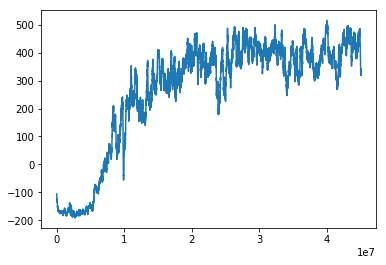

In [13]:
plt.plot(step_nums_a,vals_a_smooth)

---

### h a

In [9]:
h_1 = EventAccumulator('/hdd/Documents/HRL/experiments/100_Nav_0.1/logs/PPO2_1')
h_1.Reload()

h_2 = EventAccumulator('/hdd/Documents/HRL/experiments/102_Nav_0.1_cont/logs/PPO2_1')
h_2.Reload()

w_times_h_1, step_nums_h_1, vals_h_1 = zip(*h_1.Scalars('episode/episode_reward'))
w_times_h_2, step_nums_h_2, vals_h_2 = zip(*h_2.Scalars('episode/episode_reward'))

step_nums_h_2 = tuple([step + max(step_nums_h_1) for step in step_nums_h_2])

w_times_h   = w_times_h_1 + w_times_h_2
step_nums_h = step_nums_h_1 + step_nums_h_2
vals_h      = vals_h_1 + vals_h_2

vals_h_smooth = smooth(vals_h, 0.99)

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.


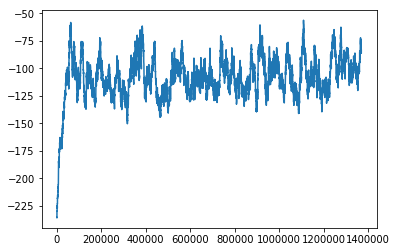

In [10]:
plt.plot(step_nums_h,vals_h_smooth)

--- 


### Saving files


In [14]:
n2n = [w_times_n2n, step_nums_n2n, vals_n2n]
h   = [w_times_h, step_nums_h, vals_h]

pickle.dump(n2n,open('./Nav_n2n_vs_h/n2n.pkl','wb'))
pickle.dump(h,open('./Nav_n2n_vs_h/h.pkl','wb'))

--- 

# ALL TOGETHER

In [15]:
w_times_n2n, step_nums_n2n, vals_n2n = pickle.load(open('./Nav_n2n_vs_h/n2n.pkl','rb'))
w_times_h, step_nums_h, vals_h = pickle.load(open('./Nav_n2n_vs_h/h.pkl','rb'))

vals_n2n_smooth = smooth(vals_n2n, 0.99)
vals_h_smooth = smooth(vals_h, 0.99)

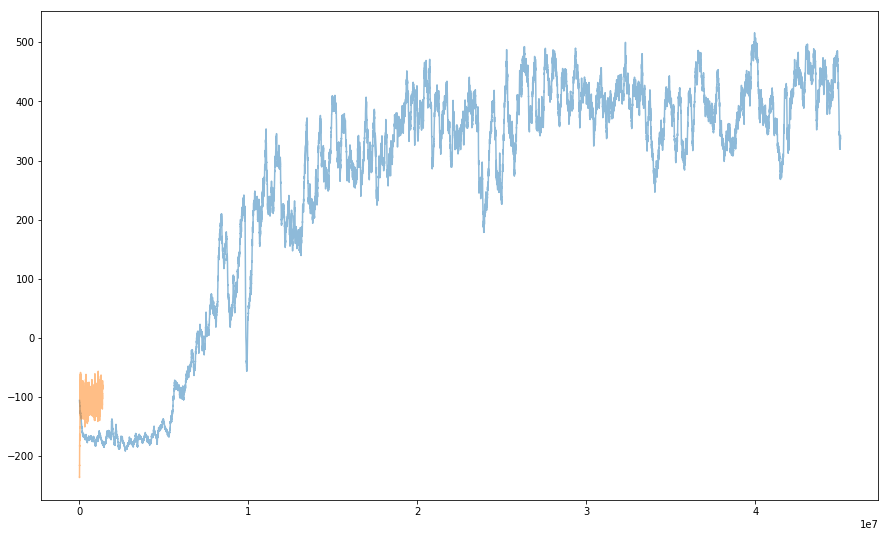

In [16]:
plt.figure(figsize=(15,9))
plt.plot(step_nums_n2n, vals_n2n_smooth,alpha=0.5)
plt.plot(step_nums_h, vals_h_smooth,alpha=0.5)

---

## Max

In [17]:
print("max val under all n2n is ", max(vals_n2n))
print("max val under all h   is ", max(vals_h))

max val under all n2n is  1186.066650390625
max val under all h   is  1101.3333740234375


---

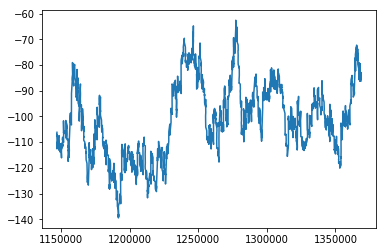

In [19]:
plt.plot(step_nums_h[-2000:],vals_h_smooth[-2000:])

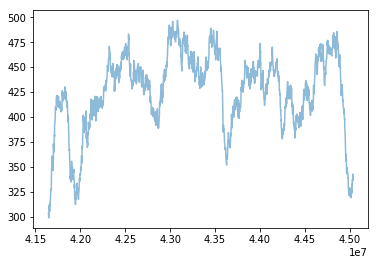

In [20]:
plt.plot(step_nums_n2n[-2000:], vals_n2n_smooth[-2000:],alpha=0.5)

---

## Std

In [21]:
print("avg val under all n2n is %0.2f and the var is %0.2f" % (
    np.mean(vals_n2n[-2000:]),
    np.std(vals_n2n[-2000:])))
print("avg val under all h   is %0.2f and the var is %0.2f" % (
    np.mean(vals_h[-2000:]),
    np.std(vals_h[-2000:])))

avg val under all n2n is 427.13 and the var is 413.23
avg val under all h   is -100.83 and the var is 232.62


---

--- 

# Experiment with no obstacles

In [6]:
N2N_exp = pd.read_csv('./Nav_n2n_vs_h/n2n.csv')
H_exp   = pd.read_csv('./Nav_n2n_vs_h/H_exp.csv')

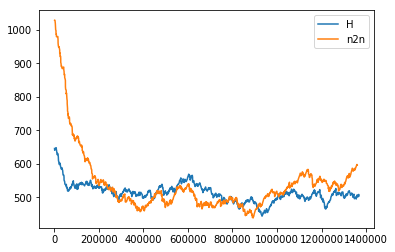

In [25]:
plt.plot(H_exp.Step.values,smooth(H_exp.Value.values,0.99),label='H')
plt.plot(N2N_exp.Step.values, smooth(N2N_exp.Value.values,0.99),label='n2n')
plt.legend()

In [30]:
H_exp.Value.describe()

count    1000.000000
mean      500.535901
std       371.585719
min      -208.566666
25%       199.283329
50%       421.349991
75%       863.225006
max      1101.133301
Name: Value, dtype: float64

In [31]:
N2N_exp.Value.describe()

count    1000.000000
mean      501.698833
std       417.671584
min      -110.900002
25%       112.166664
50%       430.683319
75%      1000.308319
max      1101.433350
Name: Value, dtype: float64